# Human Reference: Version 1 vs Version 2

We compare the two human references; v1 and v2; by mapping two ribosome profiling experiments to these references. We used the experiments 
[GSM1606107](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1606107) and
[GSM1606108](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1606108).
We processed them using the same parameters in RiboFlow.
The overall ribosome profiling QC metrics are almost the same.

The only notable differences exist in the CDS occupancy of ~200 genes. 
Generally, this is because of the inclusion / exclusion of homologs of these genes that affected their mappability.

In [1]:
import matplotlib
import matplotlib.pyplot  as plt

import ribopy
from ribopy import Ribo

import numpy as np
import pandas as pd

%matplotlib inline

import IPython

# Some formatting forthe rest of the notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Ribo Files

In [3]:
ribo_1_path   = "ribo_manuscript_supplemental/sidrauski_et_al/ribo/with_coverage/all.ribo"
ribo_1        = Ribo(ribo_1_path, alias = ribopy.api.alias.apris_human_alias)

ribo_2_path = "output/ribo/all.ribo"
ribo_2      = Ribo(ribo_2_path, alias = ribopy.api.alias.apris_human_alias)

In [4]:
ribo_1.print_info()

Ribo File Info:
---------------
Ribo File Version : 1.0
RiboPy Version    : 0.0.0
Creation Time     : 2019-11-03 13:45:40
Reference         : appris-v1
Min Read Length   : 15
Max Read Length   : 40
Metagene Radius   : 50
Left Span         : 35
Right Span        : 10

Experiments:
------------ 
Name          Reads  Coverage  RNA-Seq  Metadata
GSM1606107  7243990                  *         *
GSM1606108  8175863                  *         *


In [5]:
ribo_2.print_info()

Ribo File Info:
---------------
Ribo File Version : 1.0
RiboPy Version    : 0.0.1
Creation Time     : 2020-10-29 16:28:04
Reference         : appris-v2
Min Read Length   : 15
Max Read Length   : 40
Metagene Radius   : 50
Left Span         : 35
Right Span        : 10

Experiments:
------------ 
Name          Reads  Coverage  RNA-Seq  Metadata
GSM1606107  7265450         *                   
GSM1606108  8199693         *                   


## Length Distribution

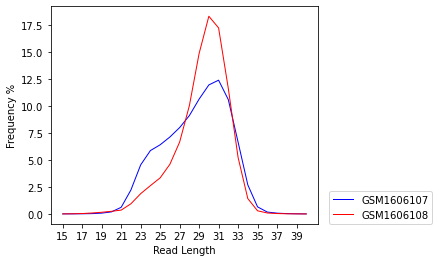

In [6]:
ribo_1.plot_lengthdist(region_type      = "CDS",
                            normalize   = True,
                            experiments = ["GSM1606107", "GSM1606108"])

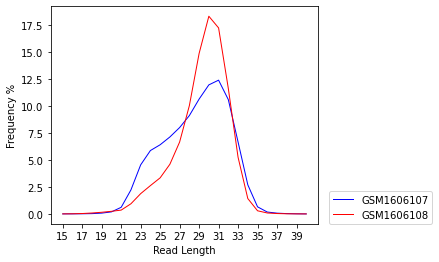

In [7]:
ribo_2.plot_lengthdist(region_type      = "CDS",
                            normalize   = True,
                            experiments = ["GSM1606107", "GSM1606108"])

In [8]:
length_dist_1 = ribo_1.get_length_dist(
                            region_name = "CDS",
                            experiments = ["GSM1606107", "GSM1606108"])

length_dist_2 = ribo_2.get_length_dist(
                            region_name = "CDS",
                            experiments = ["GSM1606107", "GSM1606108"])

In [9]:
length_dist_1.columns = ["GSM1606107", "GSM1606108"]
length_dist_2.columns = ["GSM1606107", "GSM1606108"]

#merged_length_dist = length_dist_1.merge(length_dist_2, how = "left", left_index = True)
merged_length_dist = length_dist_1.merge(length_dist_2, 
                                         left_index = True, right_index=True,
                                         suffixes   = ["_1", "_2"])
merged_length_dist

,GSM1606107_1,GSM1606108_1,GSM1606107_2,GSM1606108_2
read_length,,,,
15,356,375,358,383
16,591,975,596,992
17,1023,2742,1030,2758
18,1911,6232,1929,6270
19,4913,11228,4964,11286
20,12320,17668,12395,17765
21,39946,25851,40138,26019
22,144577,68636,145264,68941
23,295417,136887,296804,137592


## Metagene

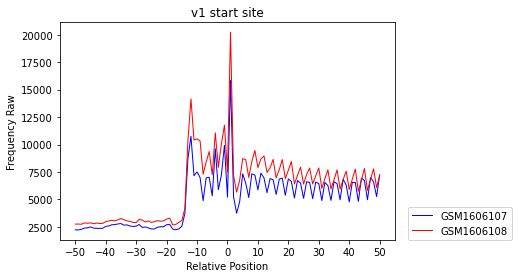

In [10]:
ribo_1.plot_metagene(site_type   = "start",
                          experiments = ["GSM1606107", "GSM1606108"],
                          range_lower = 15,
                          range_upper = 40,
                          title       = "v1 start site")

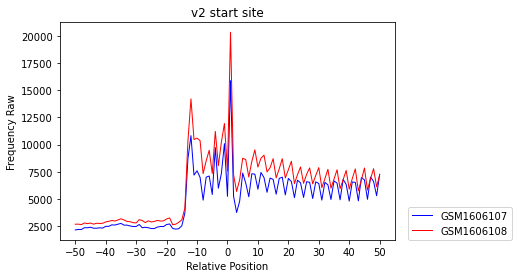

In [11]:
ribo_2.plot_metagene(site_type   = "start",
                          experiments = ["GSM1606107", "GSM1606108"],
                          range_lower = 15,
                          range_upper = 40,
                          title       = "v2 start site")

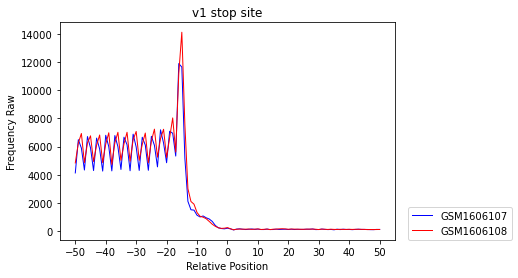

In [12]:
ribo_1.plot_metagene(site_type   = "stop",
                          experiments = ["GSM1606107", "GSM1606108"],
                          range_lower = 15,
                          range_upper = 40,
                          title       = "v1 stop site")

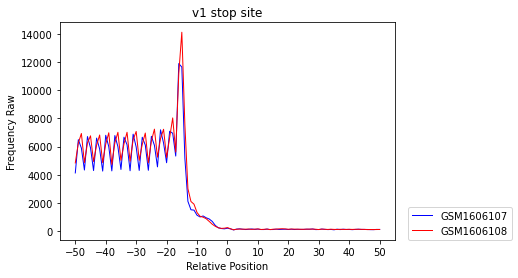

In [13]:
ribo_1.plot_metagene(site_type   = "stop",
                          experiments = ["GSM1606107", "GSM1606108"],
                          range_lower = 15,
                          range_upper = 40,
                          title       = "v1 stop site")

In [14]:
metagene_start_1 = \
   ribo_1.get_metagene(site_type      = "start",
                            range_lower    = 15,
                            range_upper    = 40,
                            sum_lengths    = True,
                            sum_references = True
                        )

metagene_start_2 = \
   ribo_2.get_metagene(site_type      = "start",
                            range_lower    = 15,
                            range_upper    = 40,
                            sum_lengths    = True,
                            sum_references = True
                        )

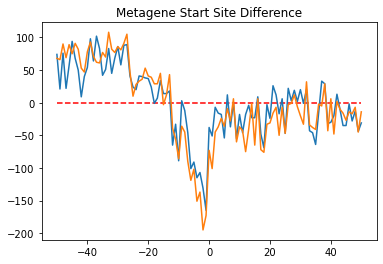

In [15]:

fig, ax = matplotlib.pyplot.subplots()
ax.plot((metagene_start_1 - metagene_start_2).loc["GSM1606107"])
ax.plot((metagene_start_1 - metagene_start_2).loc["GSM1606108"])
ax.hlines(y=0, xmin=-50, xmax = 50, color='r', linestyle='--');
plt.title("Metagene Start Site Difference");

In [16]:
metagene_stop_1 = \
   ribo_1.get_metagene(site_type      = "stop",
                            range_lower    = 15,
                            range_upper    = 40,
                            sum_lengths    = True,
                            sum_references = True
                        )

metagene_stop_2 = \
   ribo_2.get_metagene(site_type      = "stop",
                            range_lower    = 15,
                            range_upper    = 40,
                            sum_lengths    = True,
                            sum_references = True
                        )

stop_difference = metagene_stop_1 - metagene_stop_2

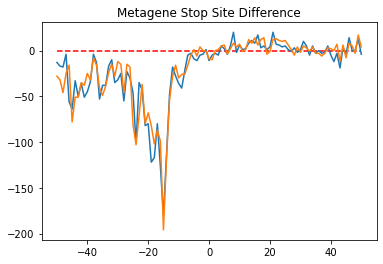

In [17]:
fig, ax = matplotlib.pyplot.subplots()
ax.plot((stop_difference).loc["GSM1606107"])
ax.plot((stop_difference).loc["GSM1606108"])
ax.hlines(y = 0, xmin = -50, xmax = 50, color = 'r', linestyle = '--');
plt.title("Metagene Stop Site Difference");

## Region Counts

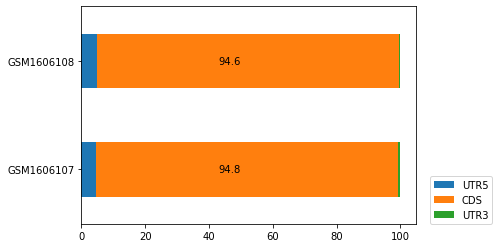

In [18]:
ribo_1.plot_region_counts(experiments = ["GSM1606107", "GSM1606108"],
                               range_lower = 15,
                               range_upper = 40,
                               horizontal  = True);

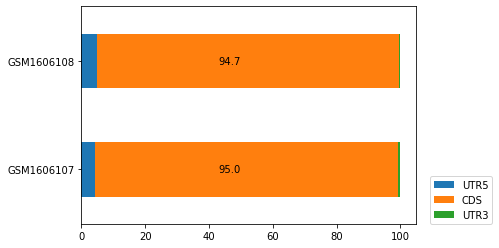

In [19]:
ribo_2.plot_region_counts(experiments = ["GSM1606107", "GSM1606108"],
                               range_lower = 15,
                               range_upper = 40,
                               horizontal  = True);

In [20]:
cds_1 = ribo_1.get_region_counts(experiments    = ["GSM1606107", "GSM1606108"],
                              region_name    = "CDS",
                              range_lower    = 15,
                              range_upper    = 40,
                              sum_lengths    = True,
                              alias          = True,
                              sum_references = False)

cds_2 = ribo_2.get_region_counts(experiments    = ["GSM1606107", "GSM1606108"],
                              region_name    = "CDS",
                              range_lower    = 15,
                              range_upper    = 40,
                              alias          = True,
                              sum_lengths    = True,
                              sum_references = False)

In [21]:
common_genes = (set(cds_1.index)).intersection( set(cds_2.index) )
cds_1_common = cds_1.loc[common_genes]["GSM1606107"]
cds_2_common = cds_2.loc[common_genes]["GSM1606107"]

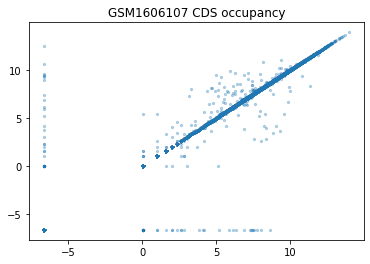

In [22]:
cds_1_log_counts = np.log2(np.array(cds_1_common) + 0.01)
cds_2_log_counts = np.log2(np.array(cds_2_common) + 0.01)

matplotlib.pyplot.scatter( cds_1_log_counts, cds_2_log_counts, alpha = 0.3, s = 5 );
plt.title("GSM1606107 CDS occupancy");

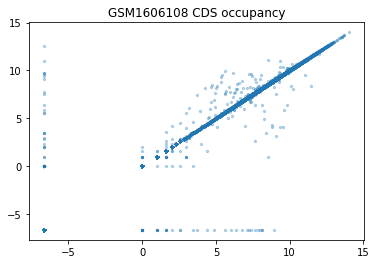

In [23]:
cds_1_common = cds_1.loc[common_genes]["GSM1606108"]
cds_2_common = cds_2.loc[common_genes]["GSM1606108"]

cds_1_log_counts = np.log2(np.array(cds_1_common) + 0.01)
cds_2_log_counts = np.log2(np.array(cds_2_common) + 0.01)

matplotlib.pyplot.scatter( cds_1_log_counts, cds_2_log_counts, alpha = 0.3, s = 5 );
plt.title("GSM1606108 CDS occupancy");

In [24]:
merged_cds = cds_1.merge(cds_2, 
                         left_index  = True, 
                         right_index = True,
                         suffixes    = ["_1", "_2"])

In [25]:
merged_cds["107_diff"] = pd.Series(merged_cds["GSM1606107_1"], dtype='int32') - \
                         pd.Series(merged_cds["GSM1606107_2"], dtype='int32')
merged_cds["108_diff"] = pd.Series(merged_cds["GSM1606108_1"], dtype='int32') - \
                         pd.Series(merged_cds["GSM1606108_2"], dtype='int32')
merged_cds["107_abs"]  = np.absolute(merged_cds["107_diff"])
merged_cds["108_abs"]  = np.absolute(merged_cds["108_diff"])

In [26]:
merged_cds.sort_values(by = ["107_abs"], ascending = False, inplace = True)
merged_cds

,GSM1606107_1,GSM1606108_1,GSM1606107_2,GSM1606108_2,107_diff,108_diff,107_abs,108_abs
transcript,,,,,,,,
EIF4A1-201,0,0,5826,5827,-5826,-5827,5826,5827
SDHA-201,2578,2812,330,321,2248,2491,2248,2491
TXNDC5-201,290,373,1886,2111,-1596,-1738,1596,1738
IPO4-201,0,0,1562,2020,-1562,-2020,1562,2020
MIF-201,672,638,2159,2089,-1487,-1451,1487,1451
...,...,...,...,...,...,...,...,...
POPDC3-201,23,39,23,39,0,0,0,0
ATG5-204,387,394,387,394,0,0,0,0
PRDM1-203,5,4,5,4,0,0,0,0


In [27]:
merged_cds[ merged_cds["107_abs"] > 5 ]

,GSM1606107_1,GSM1606108_1,GSM1606107_2,GSM1606108_2,107_diff,108_diff,107_abs,108_abs
transcript,,,,,,,,
EIF4A1-201,0,0,5826,5827,-5826,-5827,5826,5827
SDHA-201,2578,2812,330,321,2248,2491,2248,2491
TXNDC5-201,290,373,1886,2111,-1596,-1738,1596,1738
IPO4-201,0,0,1562,2020,-1562,-2020,1562,2020
MIF-201,672,638,2159,2089,-1487,-1451,1487,1451
...,...,...,...,...,...,...,...,...
MYZAP-201,5,2,11,3,-6,-1,6,1
RBAK-202,196,240,190,234,6,6,6,6
GOLGA2-201,471,528,465,522,6,6,6,6


In [28]:
merged_cds[ merged_cds["107_abs"] > 100 ]

,GSM1606107_1,GSM1606108_1,GSM1606107_2,GSM1606108_2,107_diff,108_diff,107_abs,108_abs
transcript,,,,,,,,
EIF4A1-201,0,0,5826,5827,-5826,-5827,5826,5827
SDHA-201,2578,2812,330,321,2248,2491,2248,2491
TXNDC5-201,290,373,1886,2111,-1596,-1738,1596,1738
IPO4-201,0,0,1562,2020,-1562,-2020,1562,2020
MIF-201,672,638,2159,2089,-1487,-1451,1487,1451
...,...,...,...,...,...,...,...,...
PRAF2-202,195,202,92,84,103,118,103,118
WDR26-201,960,1074,1062,1220,-102,-146,102,146
ETNK1-201,771,964,670,827,101,137,101,137


In [29]:
for a in merged_cds[ merged_cds["107_abs"] > 50 ].index:
    print(a)

EIF4A1-201
SDHA-201
TXNDC5-201
IPO4-201
MIF-201
SRSF6-201
SARNP-201
ACAD11-201
TRAPPC5-204
CFAP298-201
KRTCAP2-201
DCAF8-202
PDCD6-201
GABARAP-201
SLC39A1-204
SRP19-206
NPM1-201
EBP-205
MCM8-205
SCO2-204
SENP3-201
COX6A1-201
AHR-201
WDFY1-201
TIMM23-201
PEX19-201
ASB3-201
BCAP29-201
COPE-201
SPOUT1-201
TXNDC12-201
RAD51-201
HERC3-202
MAD1L1-204
RAD54B-202
SPINT2-201
GATC-203
RPL10-204
MRM2-201
VKORC1-205
ZNF724-201
ATG9A-205
TATDN2-201
PRPF18-202
HEATR5A-203
ALDH4A1-202
NPHP3-201
SGK3-202
MTFP1-201
FAM234A-203
PI4K2B-201
JPT2-201
SMG1-202
IRS4-201
FKBP2-202
ATP5PB-202
ARF3-201
ELL3-201
ABCB6-201
CNKSR3-205
CRLS1-201
KRT8-216
CLN3-238
CPNE1-202
IL10RB-201
NUP62-208
AP1S3-203
RNASEH1-201
TMEM19-201
PABPC1-201
PMF1-202
CLDND1-208
KYAT1-201
ZBTB9-201
PERP-201
IFNAR2-202
NUDT3-201
EGLN1-201
JTB-201
CRAMP1-202
SCAF8-201
TMEM141-201
RPL39-201
VPS16-202
ZNF511-202
EEF1AKMT2-201
POLR2M-201
SMIM7-208
KTI12-201
RNF31-201
TMEM43-201
NFS1-203
PIN4-203
R3HDM2-204
NDUFB1-201
PRAF2-202
WDR26-201
ETNK1